# Instructions:
To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

# Question 2: Predicting Building Energy Efficiency
## Objective:
Apply regression techniques using Scikit-learn to analyze and predict the energy efficiency
of buildings, focusing on heating and cooling load requirements. This involves the use of
various regression models, feature engineering, and model evaluation.
## Dataset:
The dataset for this assignment, Energy Efficiency Dataset, can be found at the UCI
Machine Learning Repository. It includes architectural features and energy efficiency
metrics of buildings. The dataset columns are renamed for clarity as follows:
```
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
```

All of the imports

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # "Support vector classifier"

## Task 1
Data Preprocessing:
- Perform exploratory data analysis (EDA) after loading the dataset.
- Conduct feature engineering if necessary.


In [3]:
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
print("Source data metadata:")
print(energy_efficiency.metadata) 
  
# variable information
print("")
print("Source data variable information:")
print(energy_efficiency.variables)

# X descriptive statistics 
print("")
print("Feature descriptive statistics:")
print(X.describe())

print("")
print("Target descriptive statistics:")
print(y.describe())


Source data metadata:
{'uci_id': 242, 'name': 'Energy efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Sat Jan 27 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learnin

In [4]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
print("")
print("Renaming the columns per:")
print(column_names)
X.rename(columns=column_names, inplace=True)
y.rename(columns=column_names, inplace=True)
print("")
print("New X:")
print(X)
print("")
print("New y:")
print(y)


Renaming the columns per:
{'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

New X:
     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   

C:\Users\Micha\AppData\Local\Temp\ipykernel_7308\1595185355.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns=column_names, inplace=True)
C:\Users\Micha\AppData\Local\Temp\ipykernel_7308\1595185355.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns=column_names, inplace=True)


In [7]:
print("")
print("Splitting the data into test and training data.")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
print("The shape of the result:")
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


Spliting the data into test and training data.
The shape of the result:
X_train shape: (614, 8)
y_train shape: (614, 2)
X_test shape: (154, 8)
y_test shape: (154, 2)


## Task 2
Model Development:
- Implement various regression models (Linear Regression, Ridge, Lasso, and
Elastic Net).
- Implement Random Forest Regression (Bonus Question - 5pts)
- Perform hyperparameter tuning for optimization.

Some utilities

In [20]:
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))

### Task 2.1

Linear Regression

In [21]:

modelHeat = LinearRegression(fit_intercept=True)
modelHeat.fit(X_train, y_train['Heating_Load'])
yfitHeat = modelHeat.predict(X_test)

print("")
print("Linear regression heating intercept:")
print(modelHeat.intercept_)
print("Linear regression heating coefficients:")
print(modelHeat.coef_)

modelCool = LinearRegression(fit_intercept=True)
modelCool.fit(X_train, y_train['Cooling_Load'])
yfitCool = modelHeat.predict(X_test)

print("")
print("Linear regression cooling intercept:")
print(modelCool.intercept_)
print("Linear regression cooling coefficients:")
print(modelCool.coef_)



Linear regression heating intercept:
89.71793630044306
Linear regression heating coefficients:
[-6.74615065e+01  2.70325996e+12 -2.70325996e+12 -5.40651992e+12
  4.16039296e+00 -3.43839226e-02  2.03578843e+01  1.96642418e-01]

Linear regression cooling intercept:
99.36310688741688
Linear regression cooling coefficients:
[-7.22275652e+01  2.17833249e+12 -2.17833249e+12 -4.35666497e+12
  4.44973868e+00  1.04135174e-01  1.51861664e+01  4.93585819e-02]


Gaussian Basis

In [22]:
gauss_model_heat = make_pipeline(GaussianFeatures(8), LinearRegression())
gauss_model_heat.fit(X_train, y_train['Heating_Load'])
yfitgauss = gauss_model_heat.predict(X_test)

print("")
print("Linear regression heating intercept:")
print(gauss_model_heat.intercept_)
print("Linear regression heating coefficients:")
print(gauss_model_heat.coef_)

InvalidIndexError: (slice(None, None, None), slice(None, None, None), None)

### Task 2.2

Ridge

NameError: name 'x' is not defined

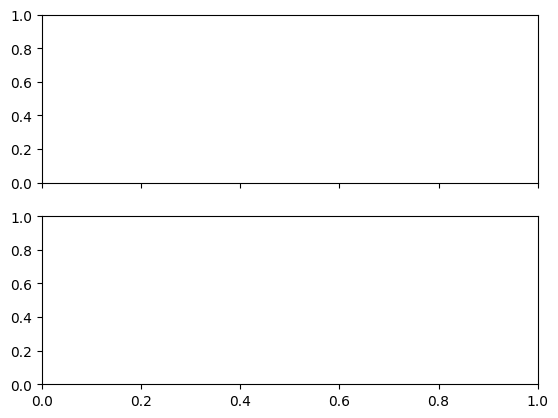

In [23]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

In [1]:






pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

#create a generator to feed the data to the dataframe.
HW6F1 = pd.read_csv('./Q1_FinancialDataset_Sentences_AllAgree.txt',sep='.@',names=['Text','Sentiment'],header=None,engine='python')
#with open('./Q1_FinancialDataset_Sentences_AllAgree.txt', encoding="utf8") as myfile:
#    mydata = (line for line in myfile)
#    HW6F1 = pd.DataFrame(mydata, columns=['line'])
#HW6F1['tag'] = [len(aLine) for aLine in HW6F1.line]
HW6F1

{'uci_id': 242, 'name': 'Energy efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Sat Jan 27 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', 'authors': '

NameError: name 'pd' is not defined

Exploratory Data Analysis (EDA):
• Perform EDA and plot bar charts for the frequency of the top 20 words in
each sentiment category.

<Axes: title={'center': 'Top 20 words for sentiment positive'}>

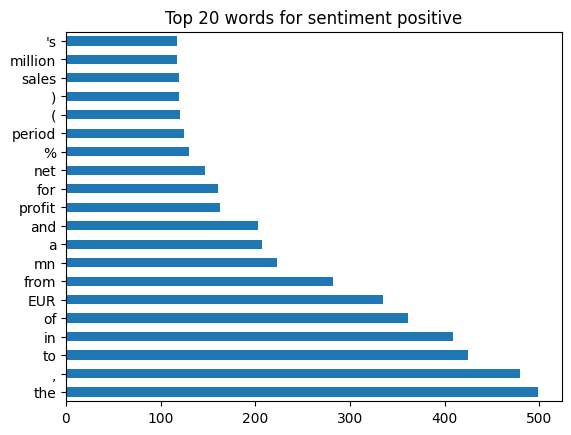

In [54]:
sel = 'positive'
plt.title(f"Top 20 words for sentiment {sel}")
HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()[:20].plot(kind='barh')
# Too many small words and punctuation. I wil get rid of words that are three characters or fewer. But, I can't see a way
# to do this in one line.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment positive'}>

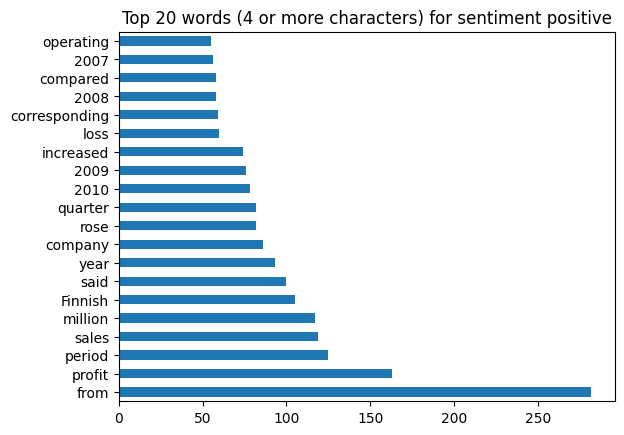

In [55]:
sel = 'positive'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')
# This is much better. I will use this approach. I could remove the years, but that may be better left as a business decision.

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment negative'}>

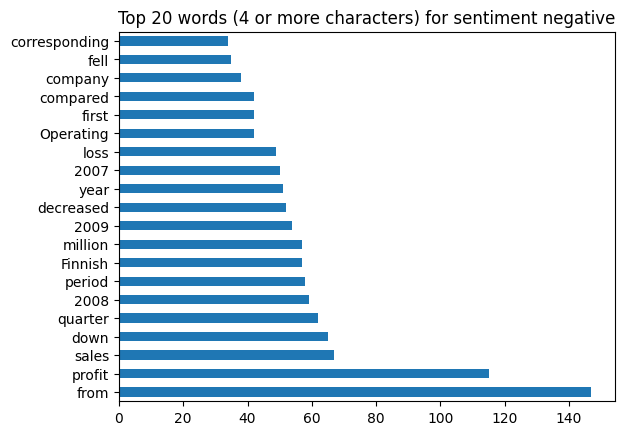

In [56]:
sel = 'negative'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')

<Axes: title={'center': 'Top 20 words (4 or more characters) for sentiment neutral'}>

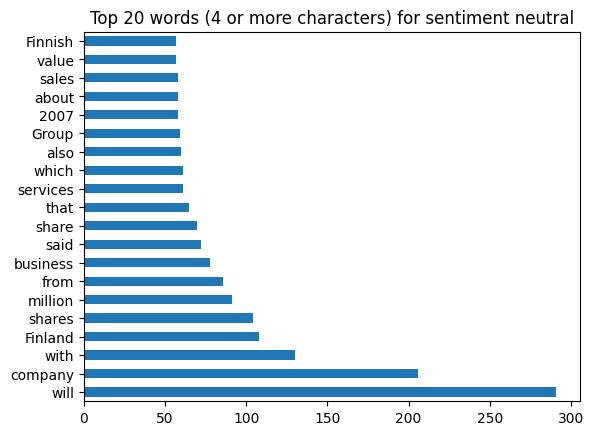

In [57]:
sel = 'neutral'
HW6F1Words = HW6F1.loc[HW6F1['Sentiment'] == sel]['Text'].str.split(expand=True).stack().value_counts()
plt.title(f"Top 20 words (4 or more characters) for sentiment {sel}")
HW6F1Words[HW6F1Words.index.str.get(3).notnull()][:20].plot(kind='barh')


Class Imbalance Analysis:
• Compute and visualize the frequency of each sentiment label with a bar graph.
Discuss class imbalance.

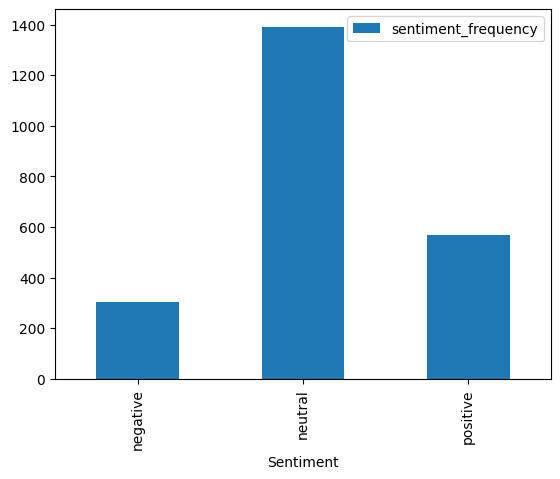

In [58]:
HW6F1Group = HW6F1.groupby("Sentiment").agg(
    sentiment_frequency=("Text", "count")
).plot(kind='bar')

I would have expected the sentiment of 'negative' to be the most frequent. This is because people generally do not speak up unless they have a complaint. But it may have to do with the source. The 'neutral' sentiment may be the most common since it is not a customer service site.

Word Count Analysis:
• Create box plots for word/token counts per sentiment label. Discuss discrepancies.

<Axes: title={'center': 'wordcount'}, xlabel='Sentiment'>

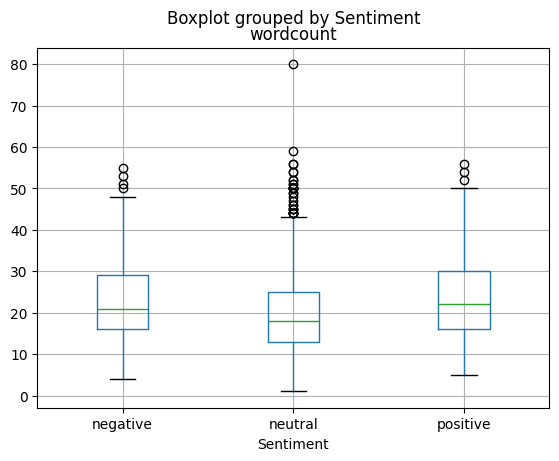

In [59]:
HW6F1['wordcount'] = HW6F1['Text'].apply(lambda x: len(str(x).split()))
HW6F1.boxplot(by = 'Sentiment', column=['wordcount'])


My expectation would have been that negative would have the longest sentences followed by neutral and then positive. They are all about the same but neutral has far more outliers. All the outliers are in the direction of longer sentences. The neutral sentences must be considering more topics and that is what makes them longer. Maybe the reviewers did not have time to fully read and understand long sentences, so they defaulted to marking them as neutral.

Data Splitting:
• Split data into training (80%) and testing (20%) sets using stratified splitting with a random seed of 64.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(HW6F1.drop('Sentiment', axis=1), HW6F1['Sentiment'], test_size=0.2, random_state=64, stratify=HW6F1['Sentiment'])

print('X_train shape:', X_train.shape)
print('y_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', X_test.shape)


X_train shape: (1811, 2)
y_train shape: (1811, 2)
X_test shape: (453, 2)
y_test shape: (453, 2)


Model Development and Evaluation:
• Vectorization: Use CountVectorizer and Tf-Idf.

In [61]:
# Vectorization: Use CountVectorizer and Tf-Idf.

vec = CountVectorizer()
X = vec.fit_transform(X_train['Text'])
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
vec = TfidfVectorizer()
X = vec.fit_transform(X_train['Text'])
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())


00  000  002  0025  003  0030  008   01  0101138  012   02  023  027   03  030   04  045  047   05  050   06  063   07  070  0711  0762   08  083  084  087   09  094  097   10  100  1000  100mn  101  102  103  104  105  106  107  109mn  10mn   11  110  111  1112  112  113  115  116  117mn  118  119  11m   12  120  1200  121  122  123  124  128  129  12mp   13  130  131  133  135  138  139   14  140  1411  142  143  145  146  146mn  149   15  150  150mn  151  152  155  156  159   16  160  161  162  163  164  1649  165  168   17  170  172  174  175  177mn  179mn  17m   18  184  188  188mn  189   19  190  191  1920  1923  193  1930s  1944757  1946  1964  1966  1983  1985  1987  1989  1996  1997  1998  1999  19mn   20  200  2000  2001  2002  2003  2004  2004b  2005  2006  2006a  2007  2007a  2008  2009  201  2010  2011  2012  2013  2014  2016  205  207  20m  20mn   21  210  211  213  215  217  218   22  220   23  2310  232  235  239   24  241  244  245  249   25  250  253  256  259  25cm  25mn   26  260  2610  262  267mn   27  270  275  27mn   28  283   29  2900  298  2982   2m  2mn   30  300  3000  300mn  302  305  309  30mn  30s   31  310  319   32  320  321  322  323   33  330  331  333  334  335  337   34  347  349   35  350  3539  358  3588   36  360  365  368  369  36m   37  377   38  380  384  385  388   39  3931  3932  395  397  398  3bn   3c   3d   3g  3mn   40  400  401  402  408   41  410  415   42  421   43  435  438  43pc   44  44million   45  452  455  457  45mn   46  460  462  467   47  470  473  474   48  483  486  487   49  495  496  497  4mn  4th   50  500  505   51  513  516   52  520  523  525   53  530  530773  5320xm  534  538  53mn   54  540  544   55  5500  553  554  556   56  561  565  566  569   57  5700  575  578  579   58  580  5800  582  585us  587   59  591  5mn   60  600  600050  600mn  609   61  6110  612  6120  614   62  620  6210  6220  626  627  628  629   63  634   64  640   65  655  659  65mn   66  661  664  666  669   67  \
0    0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00     0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   0.00  0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00   0.00   0.00 0.00 0.00 0.00 0.00   0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00   0.00     0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00 0.00  0.00  0.00  0.00  0.00  0.00   0.00  0.00  0.00   0.00  0.00   0.00  0.00  0.00 0.00  0.00  0.00  0.00  0.00  0.00  0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00  0.00 0.00   0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00  0.00   0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00       0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00    0.00    0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00   0.00 0.00 0.00 0.00 0.00 0.00 0.00    0.00   0.00 0.00 0.00  0.00 0.00  0.00 0.00 0.00 0.00  0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00  0.00 0.00 0.00 0.00 0.00 0.00 0.00   
1    0.19

Model Development and Evaluation:
• Model Training: Employ Naive Bayes

In [62]:
# Model Training: Employ Naive Bayes


model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])

Model Development and Evaluation:
• Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for Naive Bayes

In [63]:
# Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for each class
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the Naïve Bayes, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the Naïve Bayes, the accuracy is 0.7571743929359823 the precision is 0.8107263107263107 the recall is 0.5387286374524194 and th F1 Score is 0.5332706895190075.


Model Development and Evaluation:
• an overall Confusion Matrix

Text(0.5, 1.0, 'Confusion matrix for Naïve Bayes model')

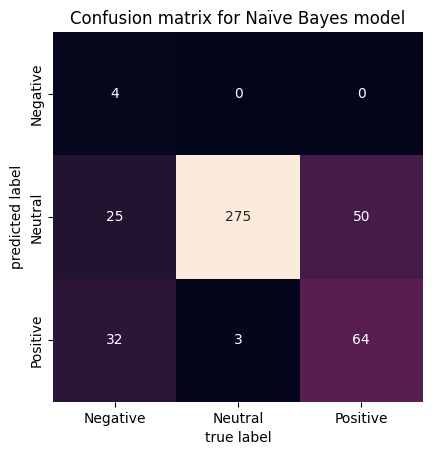

In [64]:
# An overall Confusion Matrix.
classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for Naïve Bayes model'
mat = confusion_matrix(y_test, labels)
#sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)

Model Development and Evaluation:
• Analysis: Discuss the effectiveness of each model based on the tracked metrics.

Looking at the Accuracy, Precision, Recall, and F1 Score, this model is good but not great. I would prefer to see scores in the 90s. These are all far lower. An F1 Score of 0.53 is particularly concerning. Moving to the Confusion Matrix, this is born out again. While it seems to get the Neutral right a lot, it is very poor at getting the Negative right.

Based on this, I would search for a better model.

Model Development and Evaluation:
• Model Training - Bonus Question (5pts): Employ Random Forest 


In [49]:

model = make_pipeline(TfidfVectorizer(), RandomForestClassifier(n_estimators=100, random_state=0))
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])


Model Development and Evaluation:
• Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for Random Forest

In [50]:
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the Random Forest, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the Random Forest, the accuracy is 0.8498896247240618 the precision is 0.882760070995365 the recall is 0.7300354711916404 and th F1 Score is 0.780400742117571.


Model Development and Evaluation:
• Metrics Tracking: Present an overall Confusion Matrix.

Text(0.5, 1.0, 'Confusion matrix for Random Forest model')

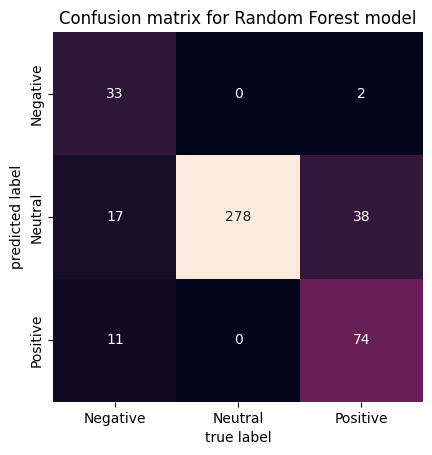

In [51]:

classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for Random Forest model'
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)

Model Development and Evaluation:
• Analysis: Discuss the effectiveness of each model based on the tracked metrics.

This model seems t be better than the Naive Bayes. Accuracy, Precisions, Recall, and the F1 Score are all much higher. They are all in the 80s or 70s. An F1 score of 0.78 is better but could still be higher. Looking at the Confusion Matrix, this model did much better on the Negative comments. It was perfect on the Neutral comments.

This is certainly better than the Naive Bayes model but I would hope that we can do better.

Model Development and Evaluation:
• Model Training - Bonus Question (5pts): Employ Support Vector Machines.

In [66]:

model = make_pipeline(TfidfVectorizer(), SVC(kernel='linear', C=1E10))
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])


Model Development and Evaluation:
• Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for each
class

In [67]:
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the linear Support Vector Machines, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the linear Support Vector Machines, the accuracy is 0.8520971302428256 the precision is 0.8101093796911109 the recall is 0.7757076478592794 and th F1 Score is 0.7905844290690999.


Text(0.5, 1.0, 'Confusion matrix for linear SVC model')

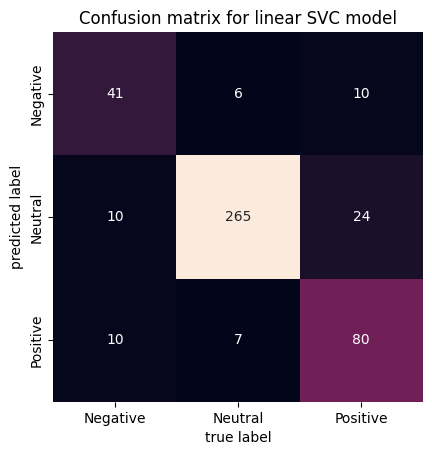

In [68]:
classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for linear SVC model'
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)

Model Development and Evaluation:
• Analysis: Discuss the effectiveness of each model based on the tracked metrics.

I was hoping that the SVC model would provide a much better outcome than the Random Forest Model. But, looking at the measures and the Confusions Matrix,it is roughly the same. The F1 Score is 0.79 which is only slightly better than the F1 Score for the Random Forest. I also note that this model did far worse on the Neutral predictions. I would be hard pressed to select this model over the Random Forest. So, the search continues.

Model Development and Evaluation:
• Model Training - Bonus Question (5pts): Employ Support Vector Machines.

In [69]:

model = make_pipeline(TfidfVectorizer(), SVC(kernel='rbf', C=1E6))
model.fit(X_train['Text'], y_train)
labels = model.predict(X_test['Text'])


Model Development and Evaluation:
• Metrics Tracking: Present Accuracy, Precision, Recall, F1-Score for each
class

In [70]:
acc = accuracy_score(y_test, labels)
prec = precision_score(y_test, labels, average='macro')
recall = recall_score(y_test, labels, average='macro')
f1score = f1_score(y_test, labels, average='macro')

print(f"For the kernelized Support Vector Machines, the accuracy is {acc} the precision is {prec} the recall is {recall} and th F1 Score is {f1score}.")

For the kernelized Support Vector Machines, the accuracy is 0.8520971302428256 the precision is 0.8459579140855326 the recall is 0.7500212082275509 and th F1 Score is 0.7864133203638781.


Text(0.5, 1.0, 'Confusion matrix for kernelized SVC model')

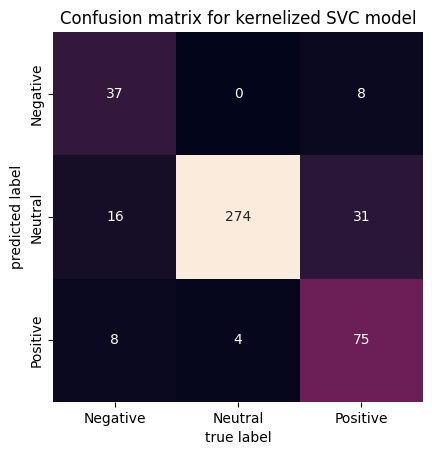

In [71]:
classes = ['Negative', 'Neutral', 'Positive']
title = 'Confusion matrix for kernelized SVC model'
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title(title)

Model Development and Evaluation:
• Analysis: Discuss the effectiveness of each model based on the tracked metrics.

The next and last model is the kernalized version of the SVC model. I had some hope that this would be significantly better. It may be that I eed to tune the Hyperparameters. But with the initial set I selected, it is roughly similar to the linear SVC model. The F1 score is slightly lower, not a significant difference. The Confusion Matrix is similar. Although this did do better on the Neutral comments. 

All in all, based on these models, I would stick with the Rand Forest Model for now.